
[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


Enter a city name:  Mumbai


📍 City: Mumbai (Lat: 19.05, Lon: 72.87)


,Date,Max Temp (°C),Min Temp (°C),Rainfall (mm),UV Index (Max),Sunshine (min),Temp Range (°C),Rainy Day
0,2025-11-12,28.9,24.7,0.0,6.45,36790.27,4.2,False
1,2025-11-13,29.7,25.4,0.0,6.45,36687.76,4.3,False
2,2025-11-14,28.9,25.3,0.0,6.45,36683.67,3.6,False
3,2025-11-15,29.4,24.8,0.0,6.40,37129.18,4.6,False
4,2025-11-16,29.0,24.4,0.0,6.35,37681.80,4.6,False


=== 📊 WEATHER SUMMARY ===
📅 Date Range: 2025-11-12 → 2025-11-18
🌡️ Avg Max Temp: 29.1 °C
🌡️ Avg Min Temp: 24.8 °C
💧 Total Rainfall: 0.0 mm
🌤️ Avg UV Index: 6.3
☀️ Avg Sunshine Duration: 619.5 hrs/day

=== 🌡️ EXTREMES ===
🔥 Hottest Day: 2025-11-13 (29.7 °C)
❄️ Coldest Day: 2025-11-18 (24.3 °C)
🌧️ Rainiest Day: 2025-11-12 (0.0 mm)


/home/sam/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


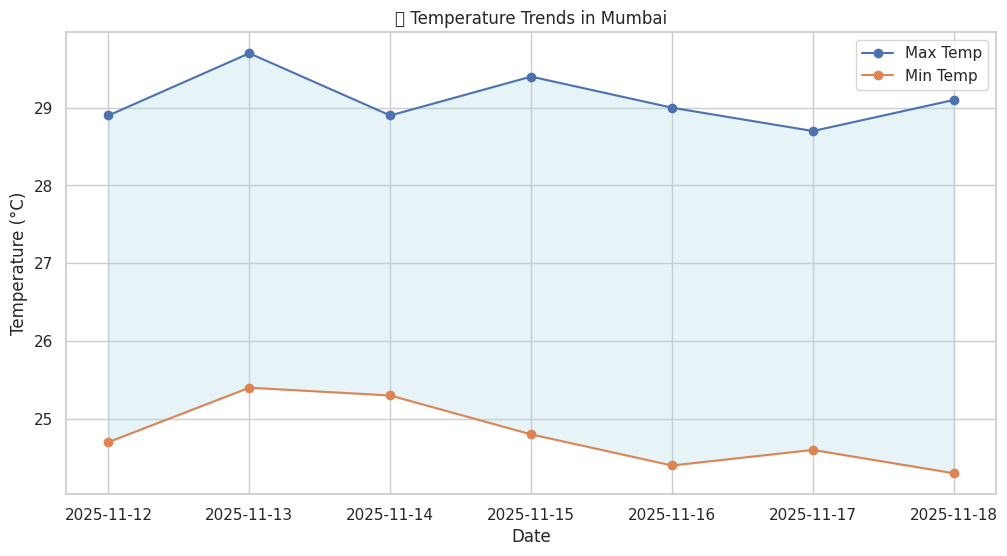

/home/sam/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128167 (\N{DROPLET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


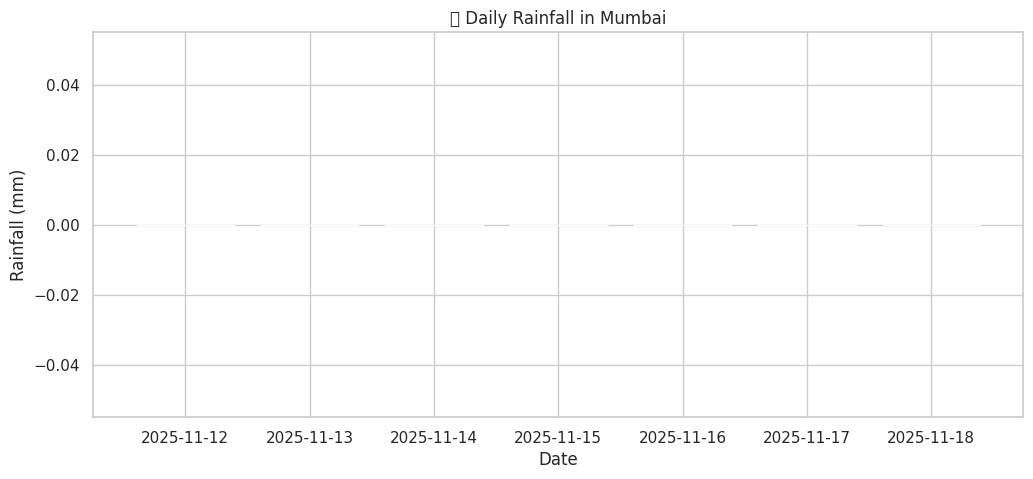

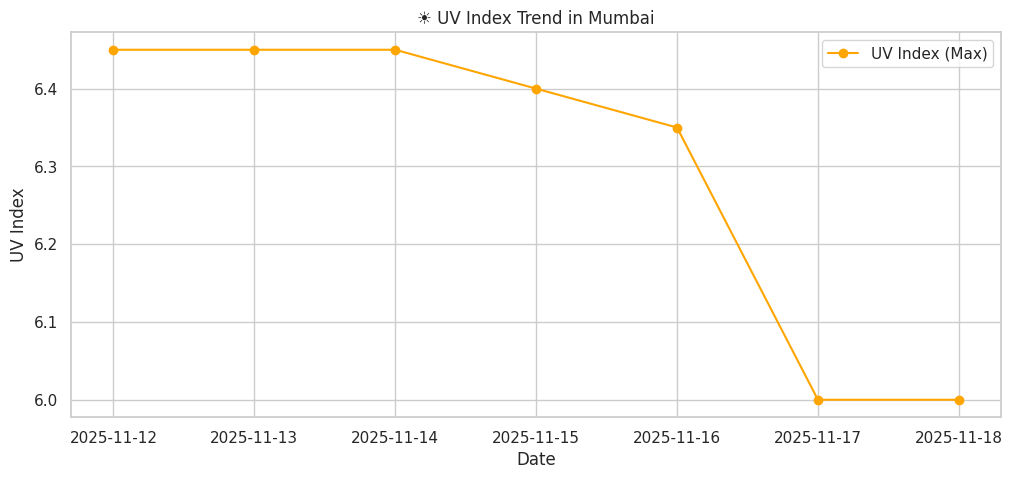

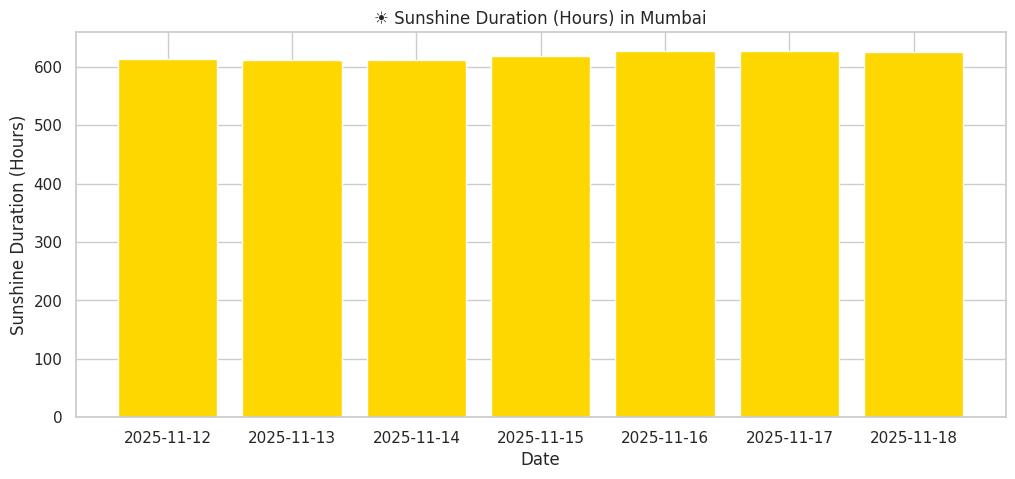


=== 🧠 AUTOMATIC WEATHER INSIGHTS ===
- Expect a hot week in Mumbai. Stay hydrated! 🥵
- Completely dry week ahead! 🌞
- Comfort Index: 29.1 → Very pleasant conditions.


/home/sam/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


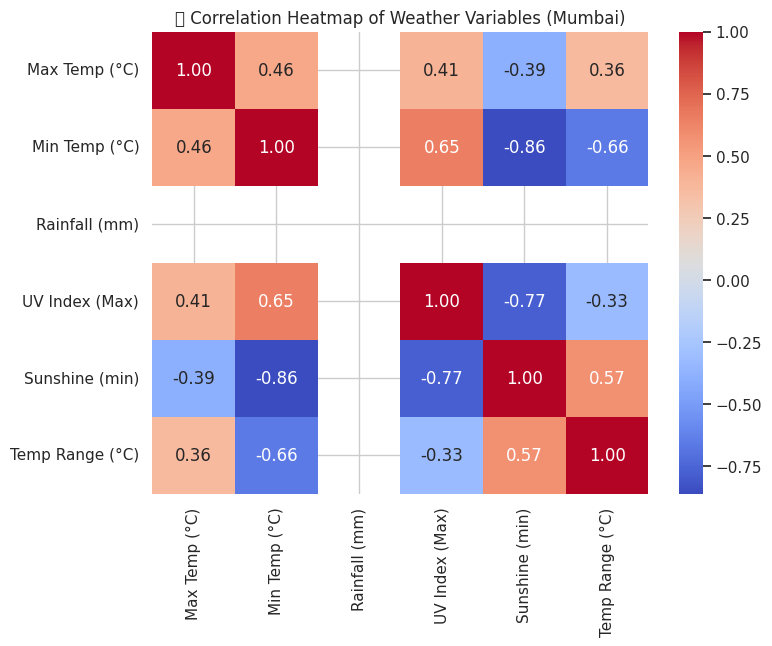

Do you want to save the weather data to CSV? (yes/no):  no



🌦️ Weather Dashboard Completed Successfully!


In [4]:

# STEP 1: INSTALL & IMPORT REQUIRED LIBRARIES
# ------------------------------------------------------------
!pip install requests pandas matplotlib seaborn geopy -q

import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
from datetime import datetime
import numpy as np

# Apply basic visualization settings
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")

# STEP 2: GET CITY INPUT & FIND COORDINATES
# ------------------------------------------------------------
city = input("Enter a city name: ").strip()

if not city:
    city = "London"  # Default fallback

geolocator = Nominatim(user_agent="weather_visualizer")
location = geolocator.geocode(city)

if not location:
    print("⚠️ Could not find city, defaulting to London.")
    city = "London"
    location = geolocator.geocode(city)

lat, lon = location.latitude, location.longitude
print(f"📍 City: {city} (Lat: {lat:.2f}, Lon: {lon:.2f})")

# STEP 3: FETCH LIVE WEATHER DATA FROM OPEN-METEO
# ------------------------------------------------------------
api_url = (
    f"https://api.open-meteo.com/v1/forecast?"
    f"latitude={lat}&longitude={lon}"
    f"&daily=temperature_2m_max,temperature_2m_min,precipitation_sum,"
    f"rain_sum,sunshine_duration,uv_index_max"
    f"&timezone=auto"
)

response = requests.get(api_url)
data = response.json()

# Handle missing data gracefully
if "daily" not in data:
    raise Exception("API did not return expected data. Try a different city.")

# STEP 4: CREATE DATAFRAME
# ------------------------------------------------------------
weather_df = pd.DataFrame({
    "Date": pd.to_datetime(data["daily"]["time"]),
    "Max Temp (°C)": data["daily"]["temperature_2m_max"],
    "Min Temp (°C)": data["daily"]["temperature_2m_min"],
    "Rainfall (mm)": data["daily"].get("precipitation_sum", [0]*len(data["daily"]["time"])),
    "UV Index (Max)": data["daily"].get("uv_index_max", [None]*len(data["daily"]["time"])),
    "Sunshine (min)": data["daily"].get("sunshine_duration", [None]*len(data["daily"]["time"]))
})

# Derived Columns
weather_df["Temp Range (°C)"] = weather_df["Max Temp (°C)"] - weather_df["Min Temp (°C)"]
weather_df["Rainy Day"] = weather_df["Rainfall (mm)"] > 0

display(weather_df.head())

# STEP 5: SUMMARY STATISTICS
# ------------------------------------------------------------
print("=== 📊 WEATHER SUMMARY ===")
print(f"📅 Date Range: {weather_df['Date'].min().date()} → {weather_df['Date'].max().date()}")
print(f"🌡️ Avg Max Temp: {weather_df['Max Temp (°C)'].mean():.1f} °C")
print(f"🌡️ Avg Min Temp: {weather_df['Min Temp (°C)'].mean():.1f} °C")
print(f"💧 Total Rainfall: {weather_df['Rainfall (mm)'].sum():.1f} mm")
print(f"🌤️ Avg UV Index: {np.nanmean(weather_df['UV Index (Max)']):.1f}")
print(f"☀️ Avg Sunshine Duration: {np.nanmean(weather_df['Sunshine (min)'])/60:.1f} hrs/day")

# Identify extreme days
print("\n=== 🌡️ EXTREMES ===")
print(f"🔥 Hottest Day: {weather_df.loc[weather_df['Max Temp (°C)'].idxmax(), 'Date'].date()} ({weather_df['Max Temp (°C)'].max()} °C)")
print(f"❄️ Coldest Day: {weather_df.loc[weather_df['Min Temp (°C)'].idxmin(), 'Date'].date()} ({weather_df['Min Temp (°C)'].min()} °C)")
print(f"🌧️ Rainiest Day: {weather_df.loc[weather_df['Rainfall (mm)'].idxmax(), 'Date'].date()} ({weather_df['Rainfall (mm)'].max()} mm)")

# STEP 6: VISUALIZATIONS
# ------------------------------------------------------------

# (a) Temperature Trends
plt.figure(figsize=(12,6))
plt.plot(weather_df["Date"], weather_df["Max Temp (°C)"], marker='o', label="Max Temp")
plt.plot(weather_df["Date"], weather_df["Min Temp (°C)"], marker='o', label="Min Temp")
plt.fill_between(weather_df["Date"], weather_df["Min Temp (°C)"], weather_df["Max Temp (°C)"], color='lightblue', alpha=0.3)
plt.title(f"🌡️ Temperature Trends in {city}")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()

# (b) Rainfall Chart
plt.figure(figsize=(12,5))
plt.bar(weather_df["Date"], weather_df["Rainfall (mm)"], color='steelblue')
plt.title(f"💧 Daily Rainfall in {city}")
plt.xlabel("Date")
plt.ylabel("Rainfall (mm)")
plt.show()

# (c) UV Index & Sunshine
plt.figure(figsize=(12,5))
plt.plot(weather_df["Date"], weather_df["UV Index (Max)"], color='orange', marker='o', label="UV Index (Max)")
plt.title(f"☀️ UV Index Trend in {city}")
plt.xlabel("Date")
plt.ylabel("UV Index")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12,5))
plt.bar(weather_df["Date"], weather_df["Sunshine (min)"]/60, color='gold')
plt.title(f"☀️ Sunshine Duration (Hours) in {city}")
plt.xlabel("Date")
plt.ylabel("Sunshine Duration (Hours)")
plt.show()

# STEP 7: ADVANCED ANALYSIS & INSIGHTS
# ------------------------------------------------------------

print("\n=== 🧠 AUTOMATIC WEATHER INSIGHTS ===")

avg_temp = weather_df["Max Temp (°C)"].mean()
rain_days = weather_df["Rainy Day"].sum()
comfort_index = round(avg_temp - (rain_days * 0.5), 1)

if avg_temp > 28:
    print(f"- Expect a hot week in {city}. Stay hydrated! 🥵")
elif avg_temp < 10:
    print(f"- Cool week ahead in {city}. Bundle up! 🧥")
else:
    print(f"- Mild and comfortable weather in {city}. 🌤️")

if rain_days >= 4:
    print(f"- Frequent rain expected ({rain_days} rainy days). Keep your umbrella handy! ☔")
elif rain_days == 0:
    print("- Completely dry week ahead! 🌞")
else:
    print(f"- Occasional rain expected on {rain_days} days.")

if comfort_index > 25:
    print(f"- Comfort Index: {comfort_index} → Very pleasant conditions.")
elif comfort_index < 15:
    print(f"- Comfort Index: {comfort_index} → May feel chilly or humid.")
else:
    print(f"- Comfort Index: {comfort_index} → Comfortable and moderate.")

# STEP 8: OPTIONAL - CORRELATION HEATMAP
# ------------------------------------------------------------
plt.figure(figsize=(8,6))
sns.heatmap(weather_df.drop(columns=["Date", "Rainy Day"]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"🔍 Correlation Heatmap of Weather Variables ({city})")
plt.show()

# STEP 9: OPTIONAL - EXPORT DATA
# ------------------------------------------------------------
save_csv = input("Do you want to save the weather data to CSV? (yes/no): ").strip().lower()
if save_csv in ["yes", "y"]:
    filename = f"weather_data_{city.lower()}_{datetime.now().strftime('%Y%m%d')}.csv"
    weather_df.to_csv(filename, index=False)
    print(f"✅ Data saved successfully as '{filename}'")

print("\n🌦️ Weather Dashboard Completed Successfully!")
